## Домашнее задание №4

***

### Укажите ФИО и группу

***

### Классификация

Вам предложен набор с признаками съедобных и несъедобных грибов.  
Набор разбит на две части:  
- тренировочный griby_train.csv
- тестовый griby_test.csv

**Задача:**  
1. загрузить данные
2. провести разведочный анализ данных:
    * определить количество признаков
    * определить тип признаков
    * проверить на наличие пропущенных значений
    * визуализировать данные - распределение по категориям для съедобных и несъедобных грибов
    * построить графики с помощью какого-либо из методов снижения размерности, например, метода главных компонент
3. построить классификатор, который как можно более точно предсказывает съедобность грибов на основе предложенных признаков с помощью:  
    * логистической регрессии
    * метода опорных векторов (для SVM важно проводить подбор гиперпараметров)
    * решающего дерева (и визуализировать дерево)
    * градиентного бустинга
4. для метода опорных векторов провести подбор оптимальных параметров
5. оценить качество полученных моделей с использованием тестового набора (accuracy, ROC AUC), построить графики для визуализации качества предсказаний 
6. оценить важность признаков
    
Чтобы получить 7 баллов, достаточно выполнить пункты 1 и 2, построить классификатор хотя бы с помощью одного метода и выполнить пункт 5.  
Чтобы получить все 10 баллов, нужно выполнить все пункты заданий 1-6.  
Нужно быть готовым ответить на вопросы по вашему варианту решения.

Задание сдавать в виде jupyter-ноутбуков (\*.ipynb) или в виде скрипта в формате \*.py  

**ВАЖНО!!!**
- Код должен быть рабочим.  
- Убедитесь, что вы не допустили утечки данных! Если же допустили, то задание верну без оценки, попрошу найти ошибку и все переделать. Выше 7 баллов при этом уже не поставлю.
- Помните про воспроизводимость &mdash; фиксируйте random-state везде, где необходимо.  
- Помните про переобучение! ***Обучаться на всем наборе данных, включая тестовый &mdash; плохая идея, качество ваших предсказаний я буду проверять на другом наборе данных! ***


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/My Drive/Classroom/Методы машинного обучения/DA_ML_20/ДЗ/Mushrooms')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # библиотека для построения графиков
import seaborn as sns # библиотека для построения графиков

from sklearn import preprocessing, decomposition, manifold, model_selection, pipeline, cluster, datasets, mixture, metrics

from sklearn import linear_model as lm
from sklearn.pipeline import Pipeline

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, roc_curve, precision_score, roc_auc_score, f1_score

from sklearn.svm import LinearSVC, SVC

from IPython.display import Image

%matplotlib inline 

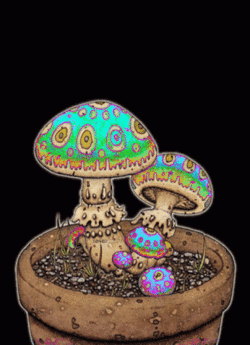

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
with open('../../images/f4f4a14e77deb7c5bbde53ce7d6ce82b.gif','rb') as f:
    Image(data=f.read(), format = 'png')

### 1. Загрузка данных

In [ ]:
## read test and train datasets:
data_train     = <здесь должен быть ваш код>
data_hold_out  = <здесь должен быть ваш код>

### 2. Разведочный анализ данных

In [ ]:
## проверка на наличие пропущенных значений
<здесь должен быть ваш код>

In [ ]:
## сколько в датасете параметров? Признак class является целевым.
<здесь должен быть ваш код>

In [ ]:
## для каждого признака вывести количество наблюдений для каждой категории
## например, с помощью метода value_counts
<здесь должен быть ваш код>

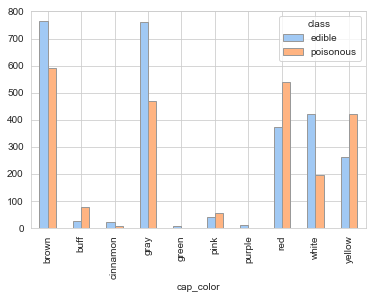

In [ ]:
## для визуализации распределения наблюдений по категориям
## можно воспользоваться вот таким примером
data_train[['cap_color','class']].groupby(['cap_color', 'class']).size().unstack().plot.bar(edgecolor=".6", #log= 'y',
                                                                                            color = sns.color_palette('pastel'));
## кстати, можно объединить data_train и data_test для построения графиков и анализа

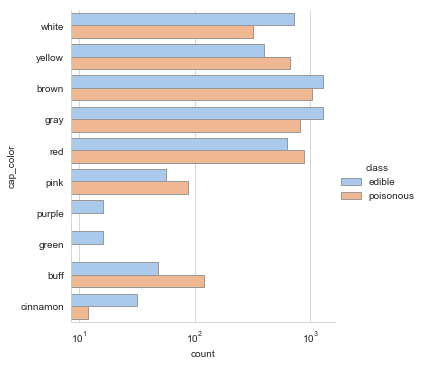

In [ ]:
## или использовать seaborn.catplot
## как в этом примере:
## https://seaborn.pydata.org/tutorial/categorical.html
sns.catplot(y="cap_color", hue="class", kind="count",
            palette="pastel", edgecolor=".6",
            data=shrooms, log= 'x');

In [ ]:
## необходимо преобразовать признаки.
## используйте dummy-кодирование / one-hot-кодирование
## например, с помощью sklearn.preprocessing.OneHotEncoder или pandas.get_dummies
## NB! Необходимо убедиться, что в наборе train есть все варианты значений!
data_train_X    = <здесь должен быть ваш код>
data_hold_out_X = <здесь должен быть ваш код>
## вот так можно добиться соответствия порядка и количества столбцов в вашем тенировочном и тестовом наборах 
## data_train_X, data_hold_out_X = data_train_X.align(data_hold_out_X, join='outer', axis=1, fill_value=0)

In [ ]:
## проверьте размерность ваших данных!!! Если количество колонок не совпадает - нужно это исправить...
<здесь должен быть ваш код>

In [ ]:
## интересно визуализировать наш набор данных с помощью seaborn.clustermap
## стоит отметить, что сходство/отличие образцов и признаков в нашем случае стоит оценивать с использованием ... метрики
## а, собственно, какой метрики?

In [ ]:
## импортируем следующие функции из scipy:
## pdist - для определения расстояний между объектами (возвращает в конденсированном виде)
## squareform - для превращения матрицы расстояний в квадратную (избыточную)
from scipy.spatial.distance import pdist, squareform

In [ ]:
## Далее приведена информация из документации к scipy.spatial.distance
## можете попробовать посчитать матрицу сходства между признаками и визуализировать ее с помощью 
## seaborn.clustermap

## Computing distances over a large collection of vectors is inefficient for these functions. 
## Use pdist for this purpose.
## Distance functions between two numeric vectors u and v: 
##   braycurtis, canberra, chebyshev, cityblock, correlation, cosine, euclidean, jensenshannon, mahalanobis,
##   minkowski, seuclidean, sqeuclidean, wminkowski
## Distance functions between two boolean vectors (representing sets) u and v: 
##   dice, hamming, jaccard, kulsinski, rogerstanimoto, russellrao, sokalmichener, sokalsneath, yule

D = squareform(pdist(data_train_X.T.values, 'cosine'))#'your_method')) ## матрица расстояний
## необходимо найти матрицу сходства
## создать на ее основе pandas.DataFrame, причем задать значения индекса и колонок, 
## соответствующие новым трансформированным признакам из таблицы shrooms_trainX
Sim = <здесь должен быть ваш код>
## для функции seaborn.clustermap лучше дополнительно задать следующие параметры:
## cmap = 'coolwarm', figsize = (25, 25));
sns.clustermap(<здесь должен быть ваш код>, cmap = 'coolwarm', figsize = (25, 25));

In [ ]:
## создадим numpy.array (или pandas.Series) с метками классов: 1 - edible, 0 - poisonous
y_train = <здесь должен быть ваш код>
y_test  = <здесь должен быть ваш код>

In [ ]:
## проведем снижение размерности наших данных с помощью PCA, MDS или другого метода
## теперь можно построить диаграмму рассеяния для наших данных в трехмерном пространстве
pca = <здесь должен быть ваш код>
scores = <здесь должен быть ваш код>
x, y, z = scores[:,0], scores[:,1], scores[:,2] # если scores -- numpy.array
#x, y, z = scores.iloc[:,0], scores.iloc[:,1], scores.iloc[:,2] # если scores -- pandas.DataFrame

class_cols = <здесь должен быть ваш код> # -- цвета, соответствующие меткам классов

from mpl_toolkits.mplot3d import Axes3D ## для построения 3D-графиков
fig = plt.figure(figsize = (9, 9)) ## зададим размер фигуры
ax = Axes3D(fig)

ax.scatter(x, y, z, color = class_cols) 

ax.view_init(30, 100) ## изменяя эти параметры вы меняете угол зрения
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


### 3. Построение классификатора с помощью:
* логистической регрессии

In [ ]:
## создадим пайплайн
## или построим модель без создания пайплайна
## используем кросс-валидацию
clf_lr = <здесь должен быть ваш код>

* метода опорных векторов (для SVM важно проводить подбор гиперпараметров)

In [ ]:
## создадим пайплайн
## или построим модель без создания пайплайна
## используем кросс-валидацию
## лучше всего воспользоваться GridSearchCV или RandomizedSearchCV для подбора гиперпараметров
clf_svc = <здесь должен быть ваш код>

* решающего дерева (и визуализировать дерево — необязательно)

In [ ]:
clf_dt = <здесь должен быть ваш код>

* градиентного бустинга (или RandomForestClassifier, ExtraTreesClassifier)

In [ ]:
xgbc = <здесь должен быть ваш код>

### 4. Подбор оптимальных параметров (для SVM)

In [ ]:
<здесь должен быть ваш код> ## Пример - в ноутбуке с последнего занятия.

### 5. Оценка качества полученных моделей с использованием тестового набора 
* Accuracy, ROC AUC, построить графики для визуализации качества предсказаний

In [ ]:
<здесь должен быть ваш код>

### 6. Оцените важность признаков

In [ ]:
<здесь должен быть ваш код>